In [158]:
!pip install tensorflow  opencv-python matplotlib

In [1]:
!pip list


Package                       Version
----------------------------- ---------------
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
black                         22.6.0
bleac

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data\non medicinal\.ipynb_checkpoints


In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 429 files belonging to 2 classes.


In [10]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
import tensorflow as tf

# Replace 'data' with the actual path to your dataset directory
data_dir = 'data'

# Create the image dataset from the directory
data = tf.keras.utils.image_dataset_from_directory(data_dir)

# Get the class names
class_names = data.class_names

# Print the class names
print(class_names)


Found 429 files belonging to 2 classes.
['medicinal', 'non medicinal']


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

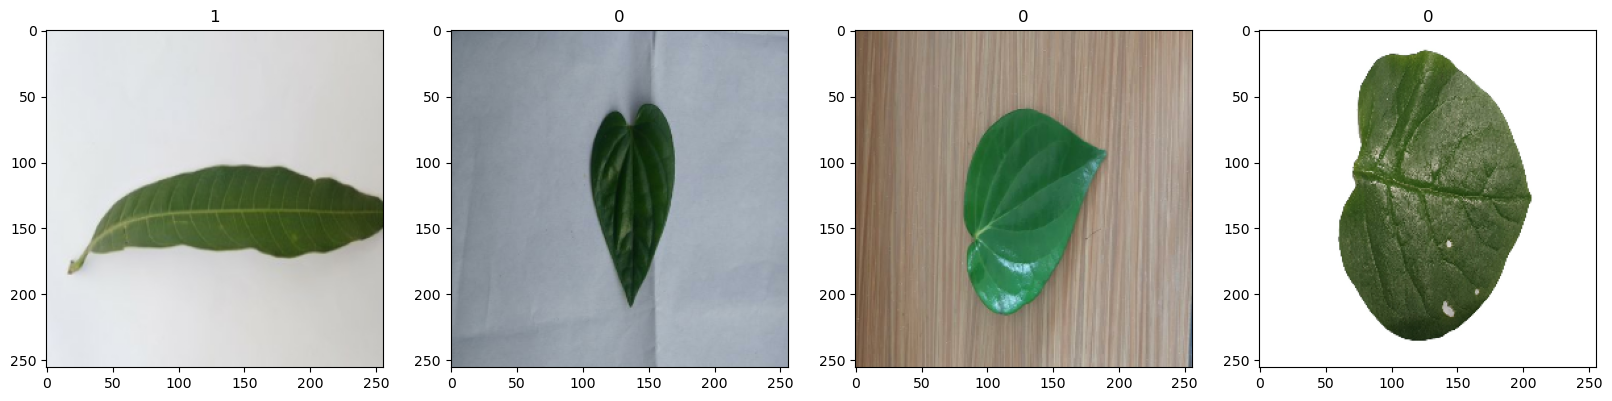

In [18]:
import matplotlib.pyplot as plt
import tensorflow as tf
# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img.astype(int))
#     ax[idx].title.set_text(batch[1][idx])

# Load your batch of images and labels here (assuming you have them)
# batch = ...

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

for idx, img in enumerate(batch[0][:4]):
    # Normalize the image data to the [0, 1] range
    img = img / 255.0  # Assuming the pixel values are in the [0, 255] range

    ax[idx].imshow(img)
    ax[idx].set_title(batch[1][idx])  # Use set_title instead of title.set_text

plt.show()


In [15]:
data = data.map(lambda x,y: (x/255, y))

In [16]:
data.as_numpy_iterator().next()

(array([[[[0.7995098 , 0.79558825, 0.779902  ],
          [0.79607844, 0.7921569 , 0.7764706 ],
          [0.79607844, 0.7921569 , 0.7764706 ],
          ...,
          [0.90588236, 0.91764706, 0.94509804],
          [0.90588236, 0.91764706, 0.94509804],
          [0.90588236, 0.91764706, 0.94509804]],
 
         [[0.79708374, 0.79316217, 0.7774759 ],
          [0.79607844, 0.7921569 , 0.7764706 ],
          [0.79607844, 0.7921569 , 0.7764706 ],
          ...,
          [0.90588236, 0.91764706, 0.94509804],
          [0.90588236, 0.91764706, 0.94509804],
          [0.90588236, 0.91764706, 0.94509804]],
 
         [[0.79607844, 0.7921569 , 0.7764706 ],
          [0.79607844, 0.7921569 , 0.7764706 ],
          [0.79607844, 0.7921569 , 0.7764706 ],
          ...,
          [0.90788907, 0.9196538 , 0.94710475],
          [0.90663487, 0.9183996 , 0.94585055],
          [0.90588236, 0.91764706, 0.94509804]],
 
         ...,
 
         [[0.8161765 , 0.8004902 , 0.7887255 ],
          [0.81960

In [19]:
len(data)

14

In [20]:
14*.2



2.8000000000000003

In [21]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [22]:
test_size+train_size+val_size

14

In [23]:
train_size

9

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [30]:
logdir='logs'

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [32]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
9/9 [==============================] - 8s 736ms/step - loss: 0.7297 - accuracy: 0.5903 - val_loss: 0.5332 - val_accuracy: 0.7188
Epoch 2/20
9/9 [==============================] - 7s 770ms/step - loss: 0.4477 - accuracy: 0.7951 - val_loss: 0.3614 - val_accuracy: 0.8021
Epoch 3/20
9/9 [==============================] - 8s 837ms/step - loss: 0.2732 - accuracy: 0.8819 - val_loss: 0.1937 - val_accuracy: 0.9062
Epoch 4/20
9/9 [==============================] - 9s 914ms/step - loss: 0.1668 - accuracy: 0.9271 - val_loss: 0.1047 - val_accuracy: 0.9583
Epoch 5/20
9/9 [==============================] - 9s 886ms/step - loss: 0.1234 - accuracy: 0.9410 - val_loss: 0.1815 - val_accuracy: 0.8854
Epoch 6/20
9/9 [==============================] - 9s 919ms/step - loss: 0.0815 - accuracy: 0.9583 - val_loss: 0.0535 - val_accuracy: 0.9688
Epoch 7/20
9/9 [==============================] - 9s 864ms/step - loss: 0.0599 - accuracy: 0.9792 - val_loss: 0.0706 - val_accuracy: 0.9792
Epoch 8/20
9/9 [====

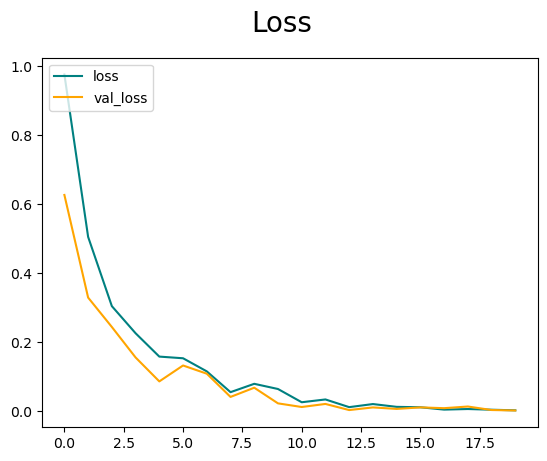

In [190]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

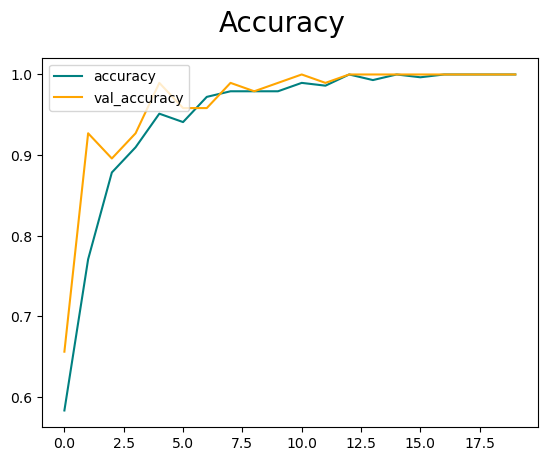

In [191]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [192]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [193]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [194]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 274ms/step


In [195]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [2]:
import cv2

In [3]:
img = cv2.imread('./test/non/Spider.jpg')
plt.imshow(img)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [260]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 39ms/step


In [261]:
yhat

array([[0.99944496]], dtype=float32)

In [262]:
if yhat > 0.5: 
    print(f'Predicted class is Non-Med')
else:
    print(f'Predicted class is Med')

Predicted class is Non-Med
